In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Resources/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


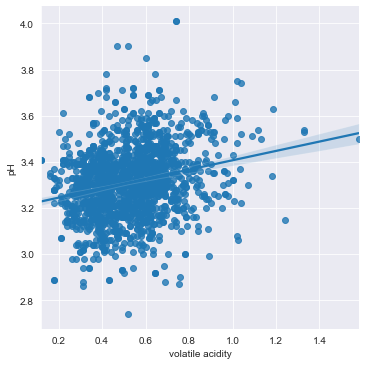

In [3]:
import seaborn as sns
sns.set_style('darkgrid')
sns.lmplot(x="volatile acidity", y="pH", data = df)

# the higher the volatile acidity (vinegar taste), the higher the pH level (more base than acid)
# recommend to restaurants that serve foods to match

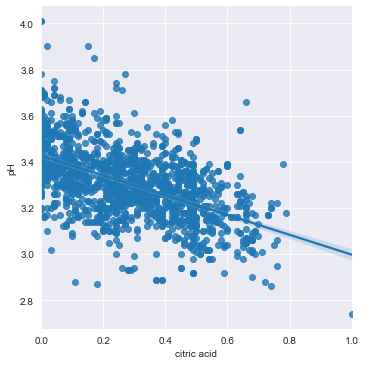

In [4]:
sns.lmplot(x="citric acid", y="pH", data = df)

# the higher the citric acid (used to add flavors to wines), the lower the pH level
# recommend to restaurants that serve foods to match

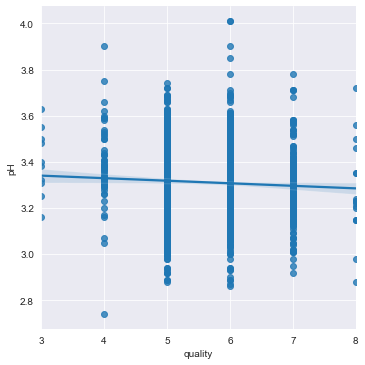

In [13]:
sns.lmplot(x="quality", y="pH", data = df)
plt.savefig('quality_ph.png')

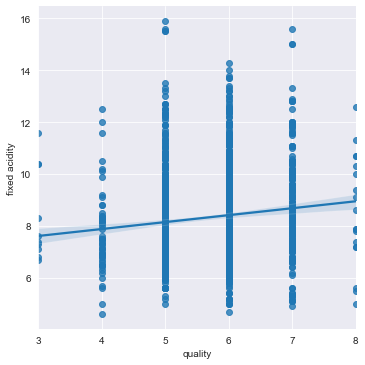

In [14]:
sns.lmplot(x="quality", y="fixed acidity", data = df)
plt.savefig('quality_fixed_acidity.png')

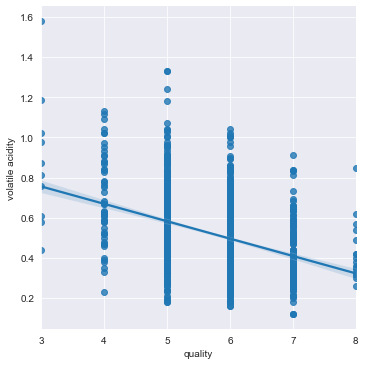

In [15]:
sns.lmplot(x="quality", y="volatile acidity", data = df)
plt.savefig('quality_volatile_acidity.png')

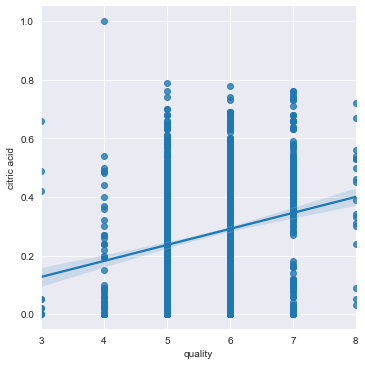

In [16]:
sns.lmplot(x="quality", y="citric acid", data = df)
plt.savefig('quality_citric_acid.png')

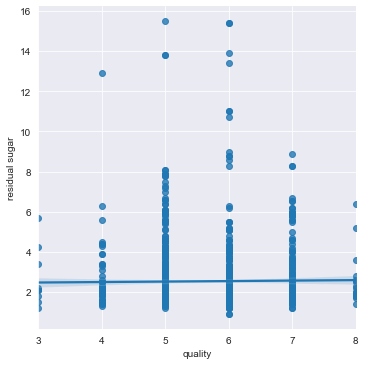

In [17]:
sns.lmplot(x="quality", y="residual sugar", data = df)
plt.savefig('quality_residual_sugar.png')

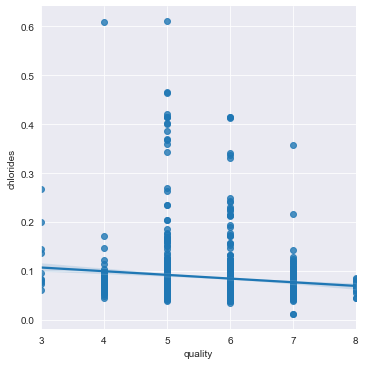

In [18]:
sns.lmplot(x="quality", y="chlorides", data = df)
plt.savefig('quality_chlorides.png')

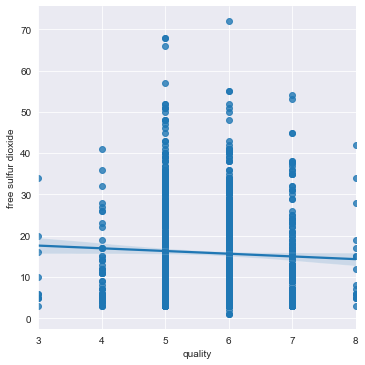

In [19]:
sns.lmplot(x="quality", y="free sulfur dioxide", data = df)
plt.savefig('quality_free_sulfur_dioxide.png')

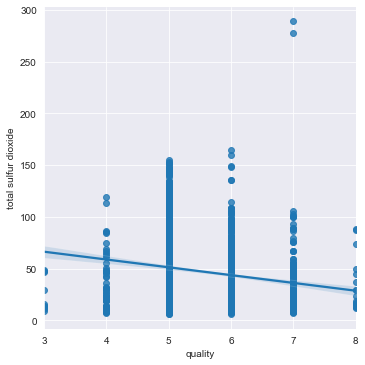

In [20]:
sns.lmplot(x="quality", y="total sulfur dioxide", data = df)
plt.savefig('quality_total_sulfur_dioxide.png')

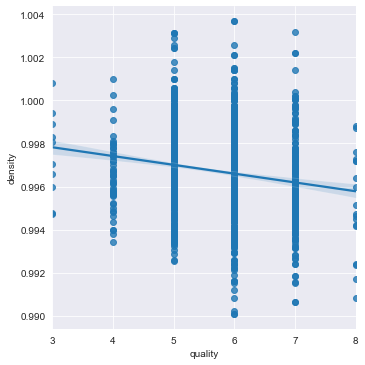

In [21]:
sns.lmplot(x="quality", y="density", data = df)
plt.savefig('quality_density.png')

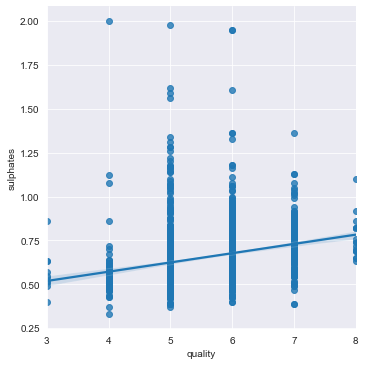

In [22]:
sns.lmplot(x="quality", y="sulphates", data = df)
plt.savefig('quality_sulphates.png')

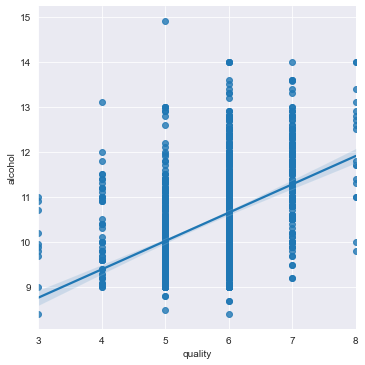

In [23]:
sns.lmplot(x="quality", y="alcohol", data = df)
plt.savefig('quality_alcohol.png')

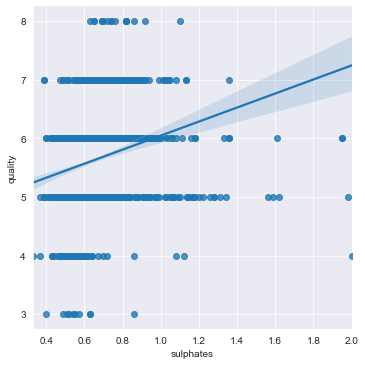

In [24]:
sns.lmplot(x="sulphates", y="quality", data = df)
plt.savefig('sulphates_quality.png')

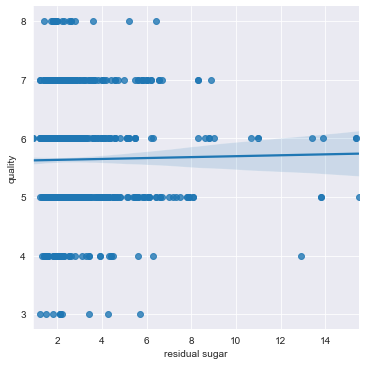

In [25]:
sns.lmplot(x="residual sugar", y="quality", data = df)
plt.savefig('sugar_quality.png')

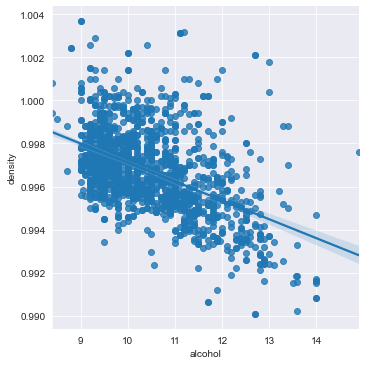

In [26]:
sns.lmplot(x="alcohol", y="density", data = df)
plt.savefig('alcohol_density.png')

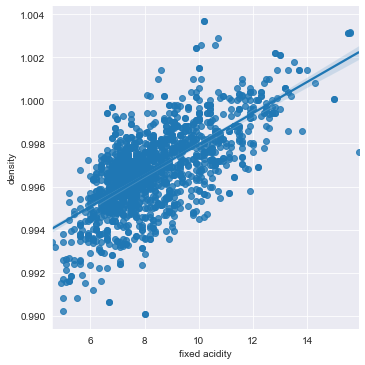

In [27]:
sns.lmplot(x="fixed acidity", y="density", data = df)
plt.savefig('acidity_density.png')

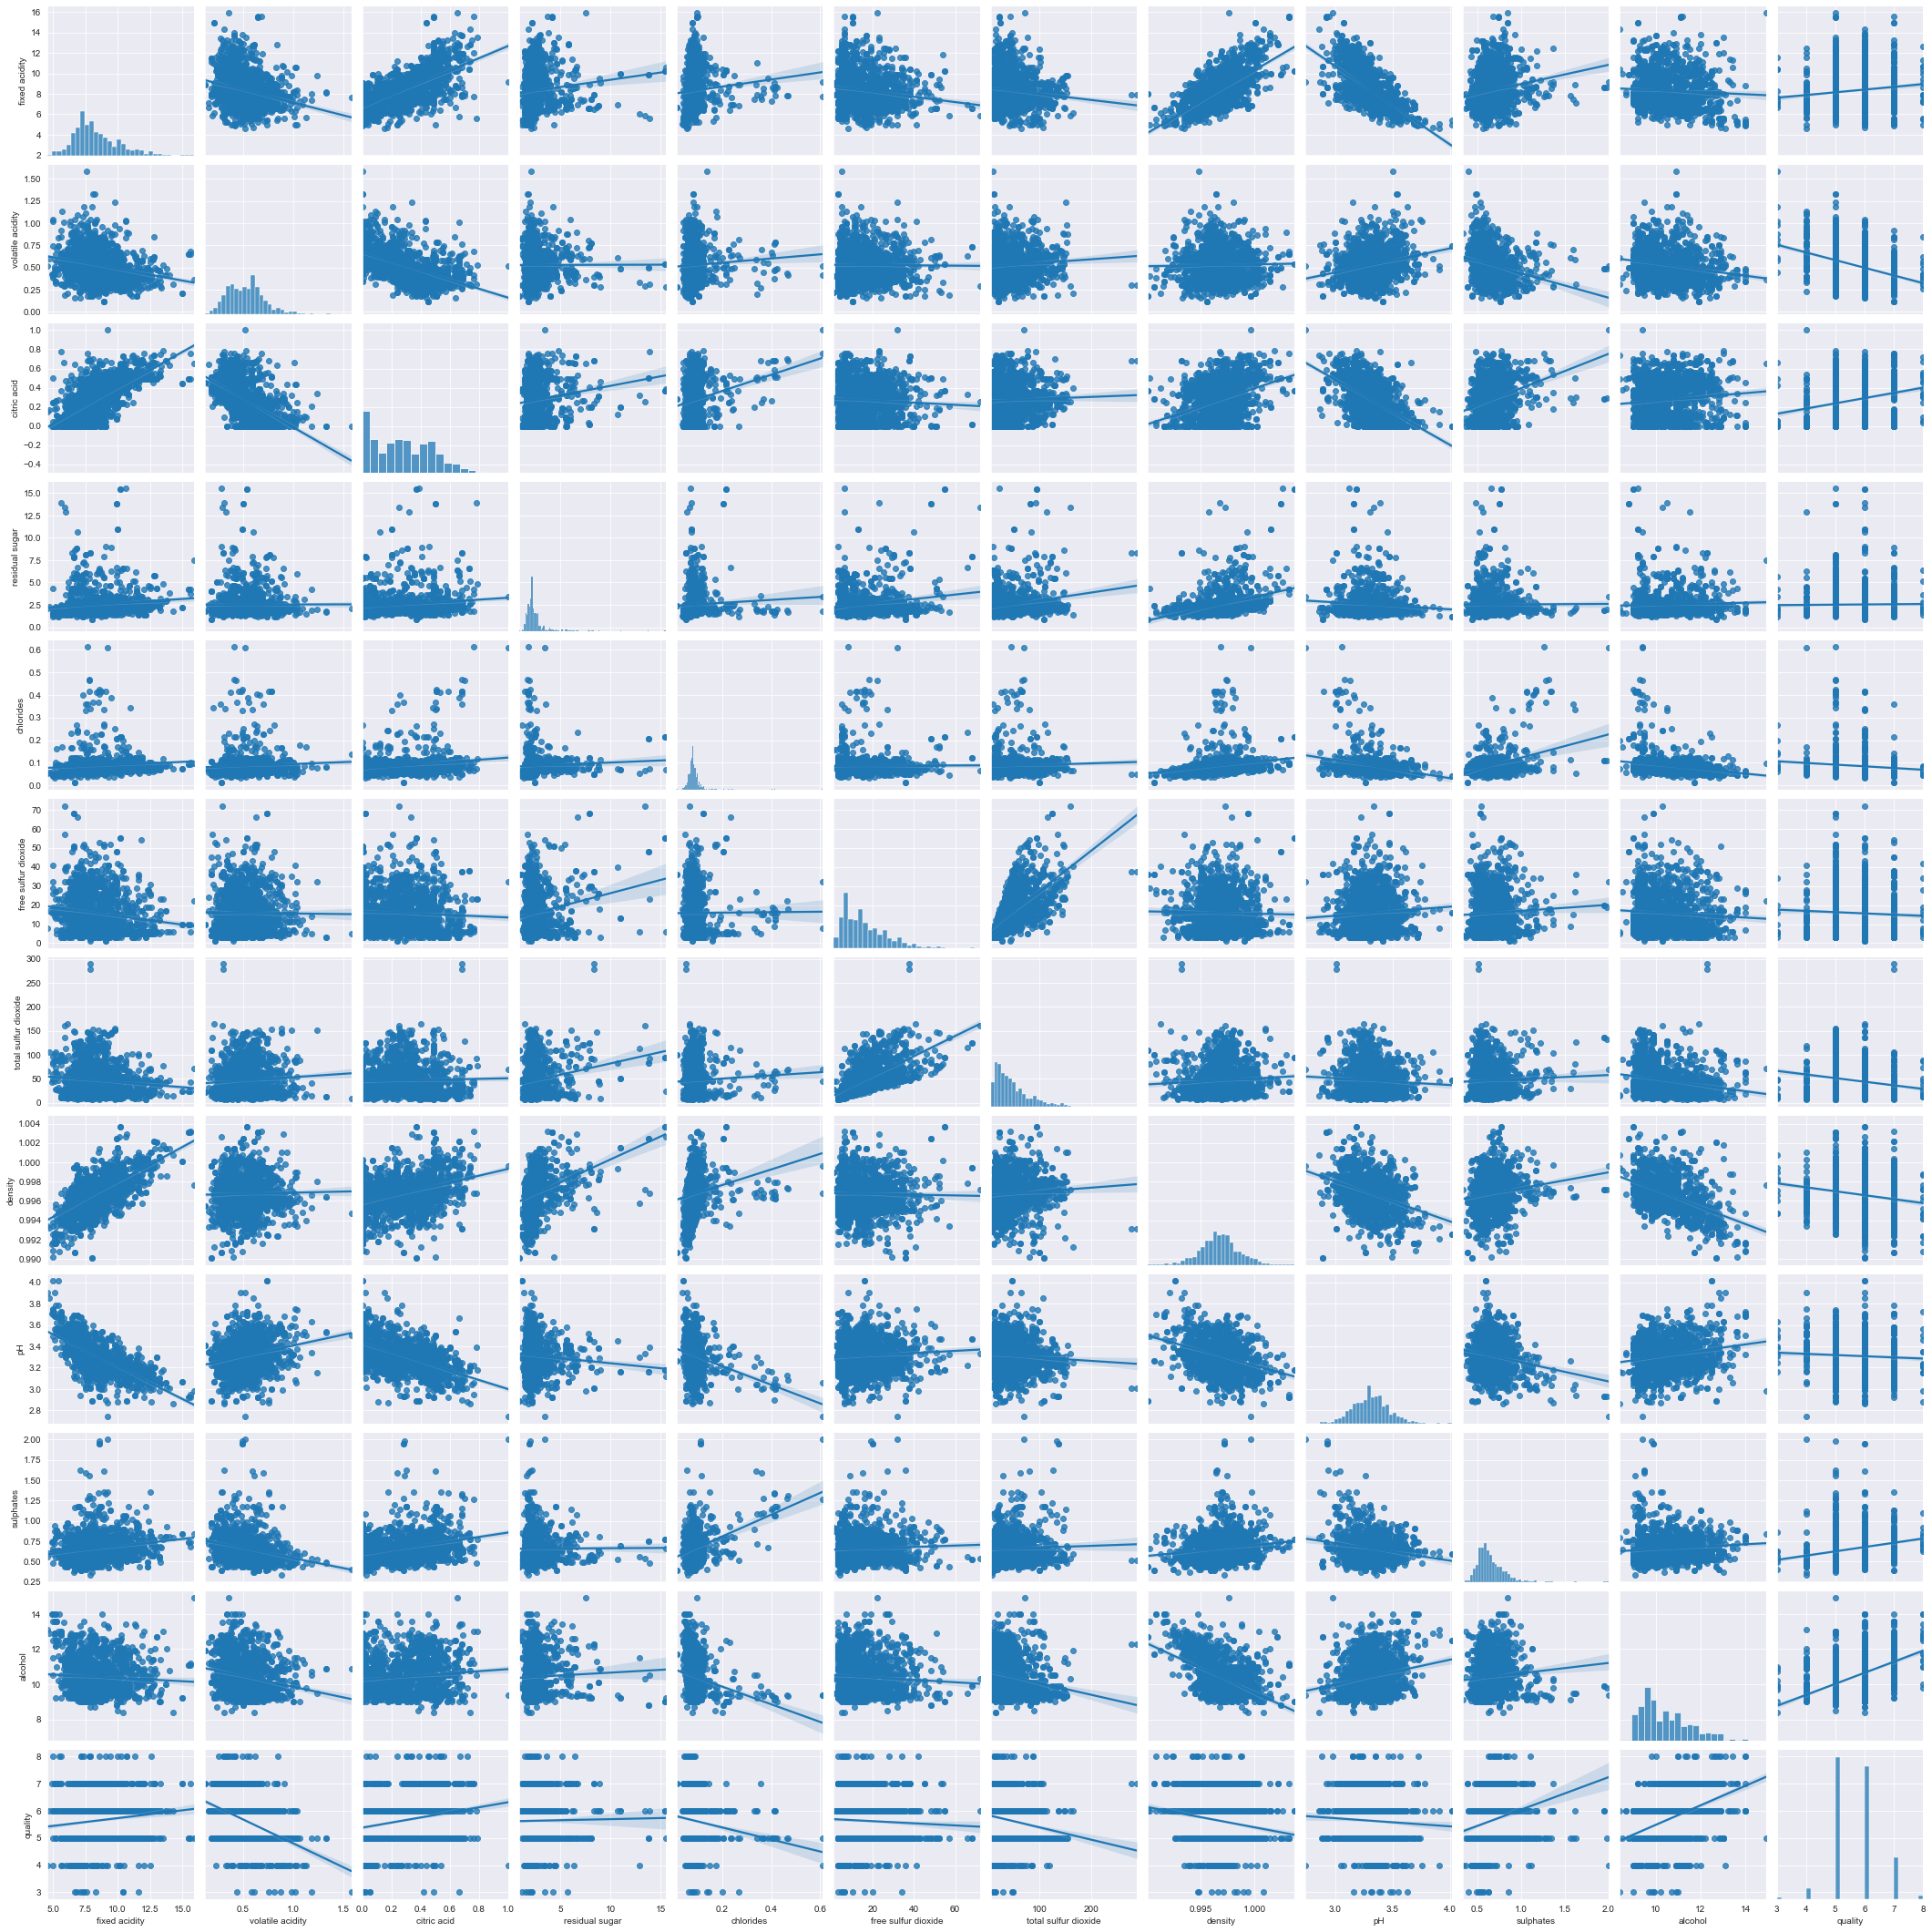

In [5]:
sns.pairplot(df, kind='reg')

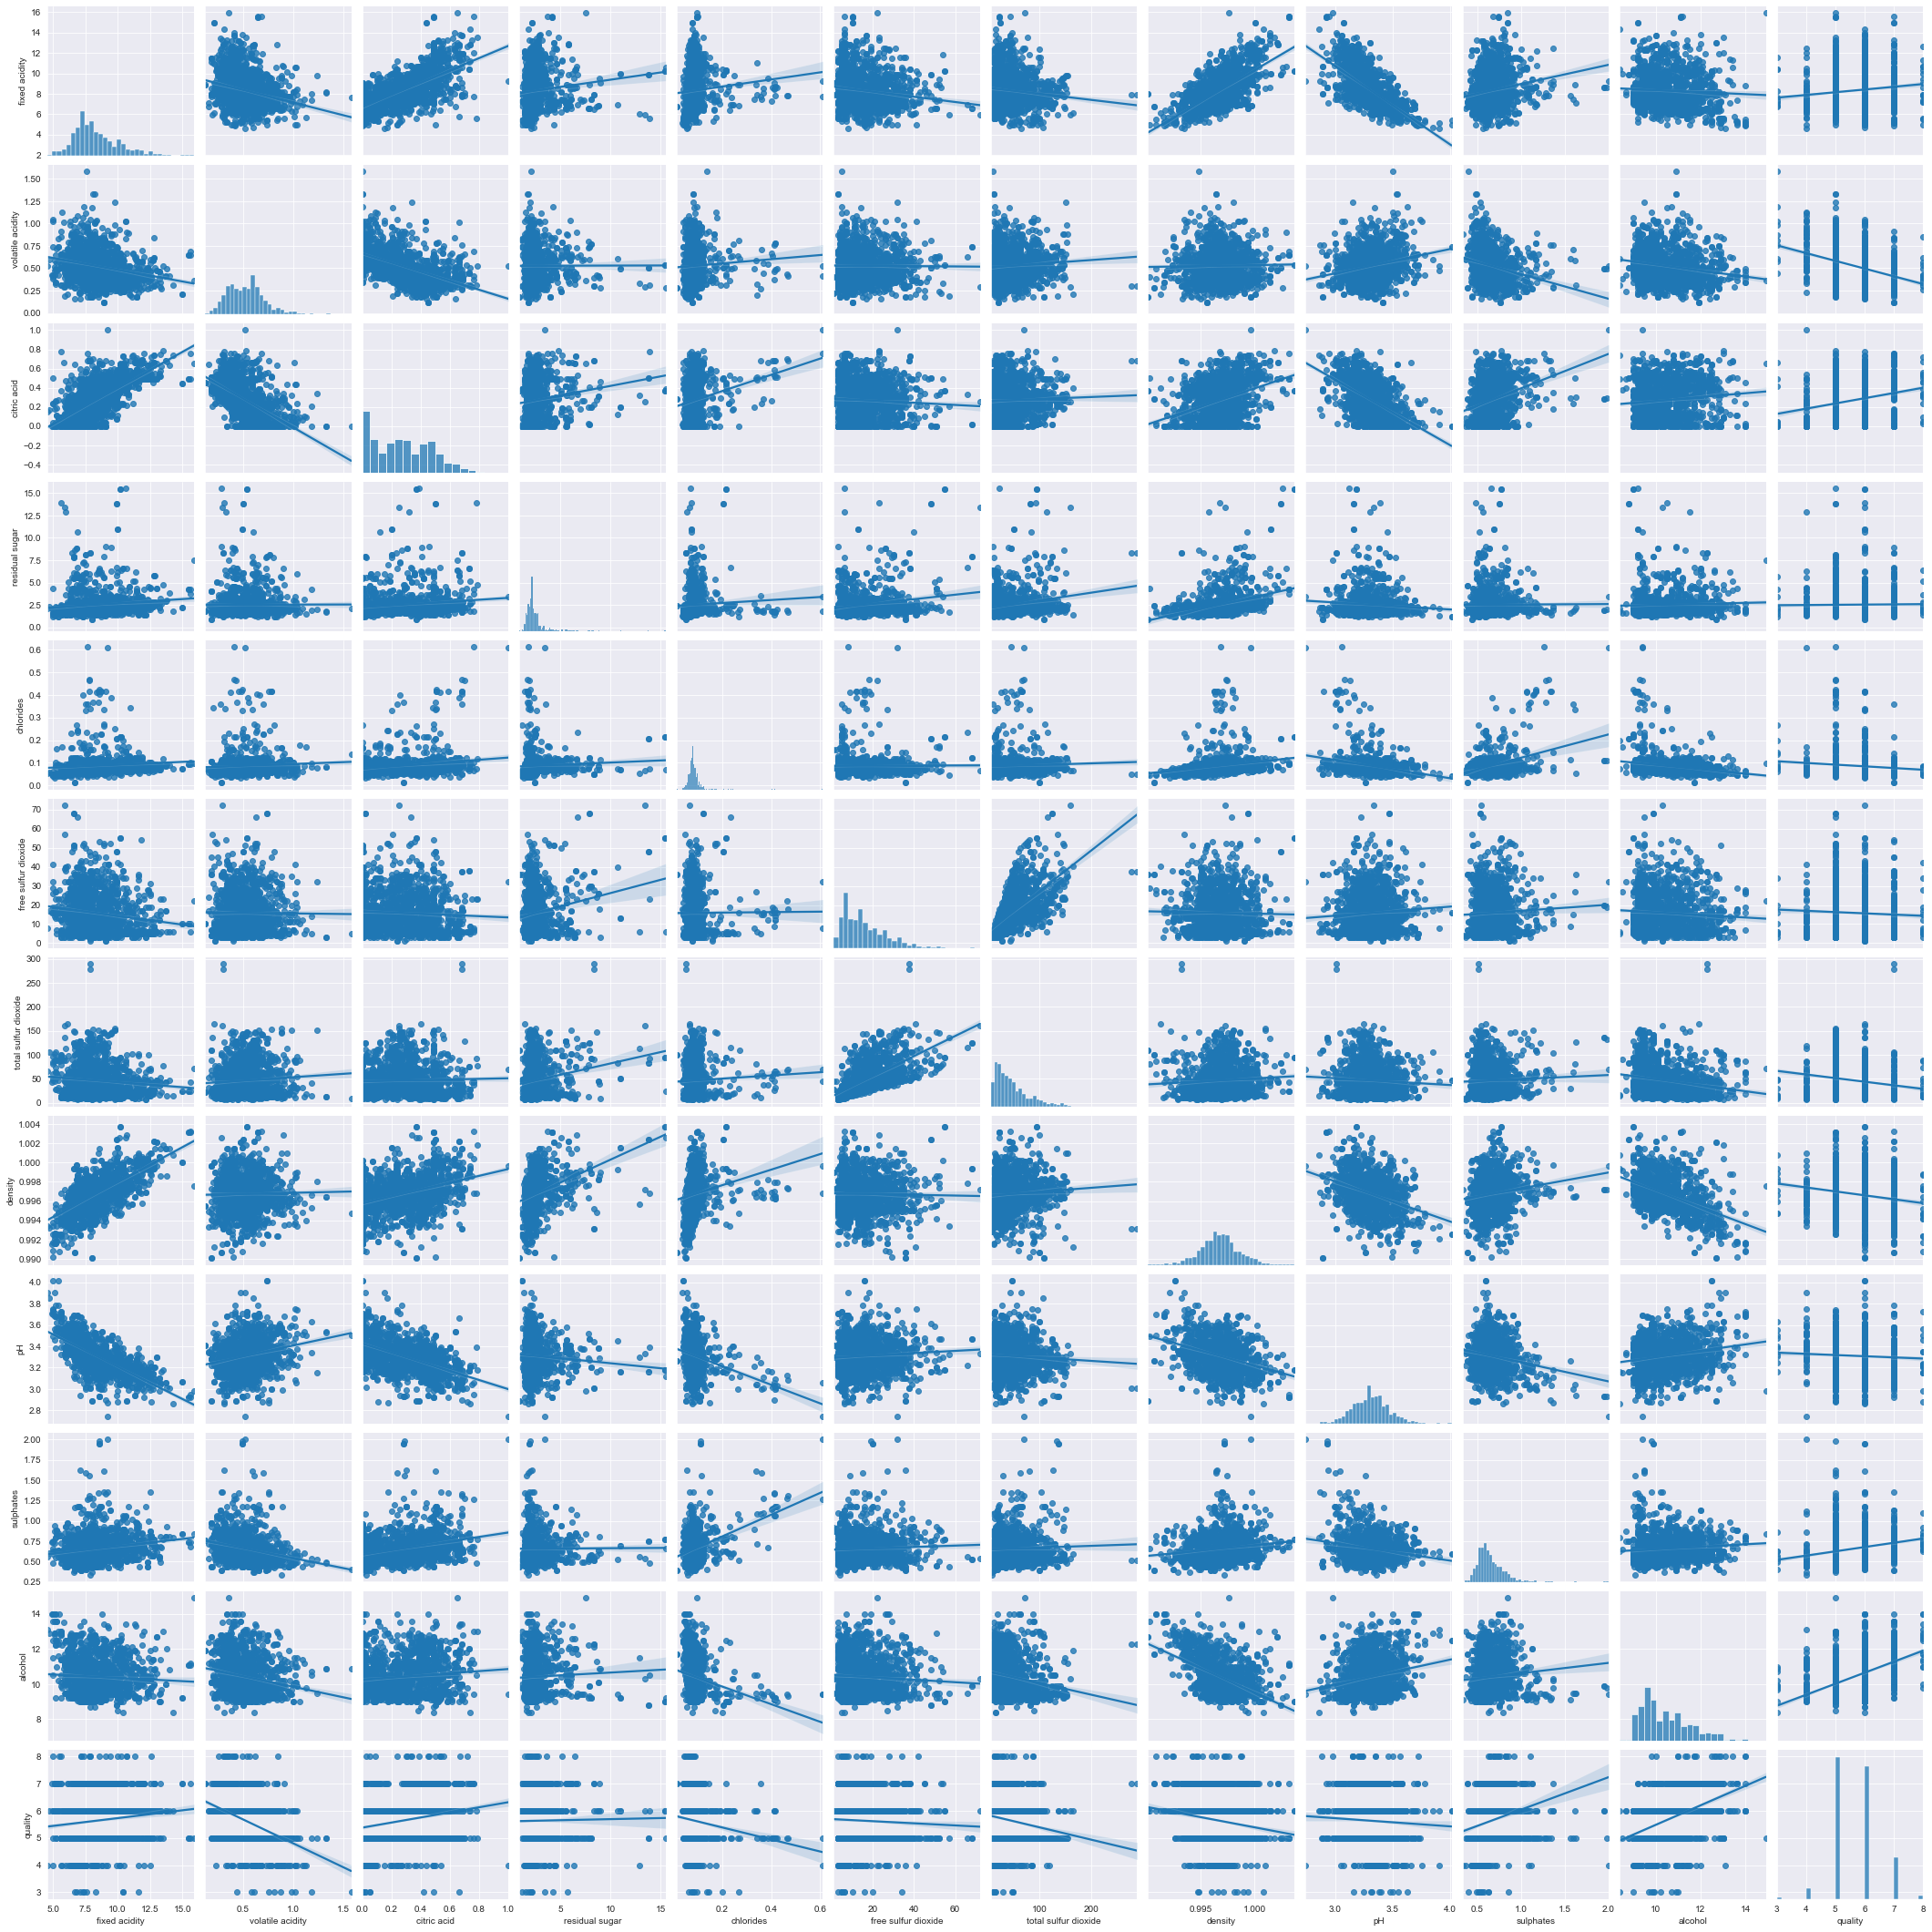

In [10]:
# sns.pairplot(df, kind='reg')
# plt.savefig('output.png')

In [ ]:
# Assign the data to X and y

X = df[["volatile acidity", "citric acid"]]
y = df["pH"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [ ]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION